# IDA Credits EDA #

For this assignment we searched on datahub.io for a financial dataset, this led me to The World Bank website which makes all it's datasets public and available for us to use. Here we will assess the suitablity of the IRA Credits dataset for a classification task. Our initial idea was that we could use the dataset to try and predict the credit status of each different credit, with the view to Predict whether furture credits get repayed or cancelled.

### Importing neccessary functions ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset ###

In [2]:
# The data is stored on google drive, so we imoport it here
csv_link = "https://drive.google.com/uc?id=1nqO4kDmA04Lq3aovME1EyhU_L_EzmiWF"
data = pd.read_csv(csv_link)

### Shape of Dataframe ###

In [3]:
# Print the shape of the dataframe
print(data.shape)

(8298, 30)


The data is made up of 8298 different credits with 30 different features.

In [4]:
# Create and print a list of all possible credit status values
credit_status_values = data['Credit Status'].unique().tolist()
print(credit_status_values)

['Fully Repaid', 'Repaying', 'Fully Cancelled', 'Disbursing&Repaying', 'Terminated', 'Effective', 'Signed', 'Fully Disbursed', 'Disbursing', 'Approved']


Each credit has a status from the list above.

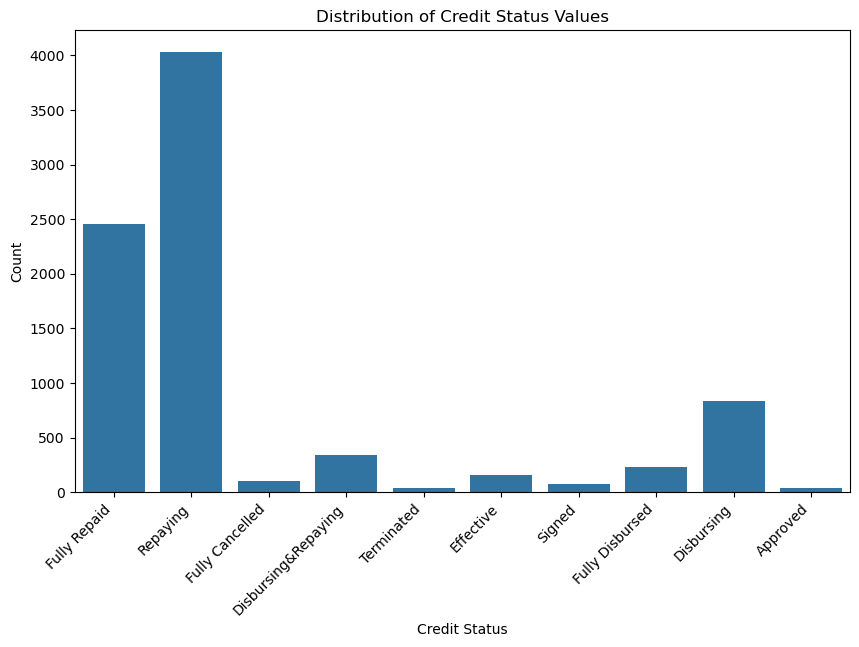

In [5]:
# Plot a histogram to show the distribution of the different credit status values
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Credit Status', order=credit_status_values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Credit Status Values')
plt.xlabel('Credit Status')
plt.ylabel('Count')
plt.show()

We see here that around half the credits are still being repayed and just over a quarter have been fully repaid, we see there are few credits that get cancelled or terminated.

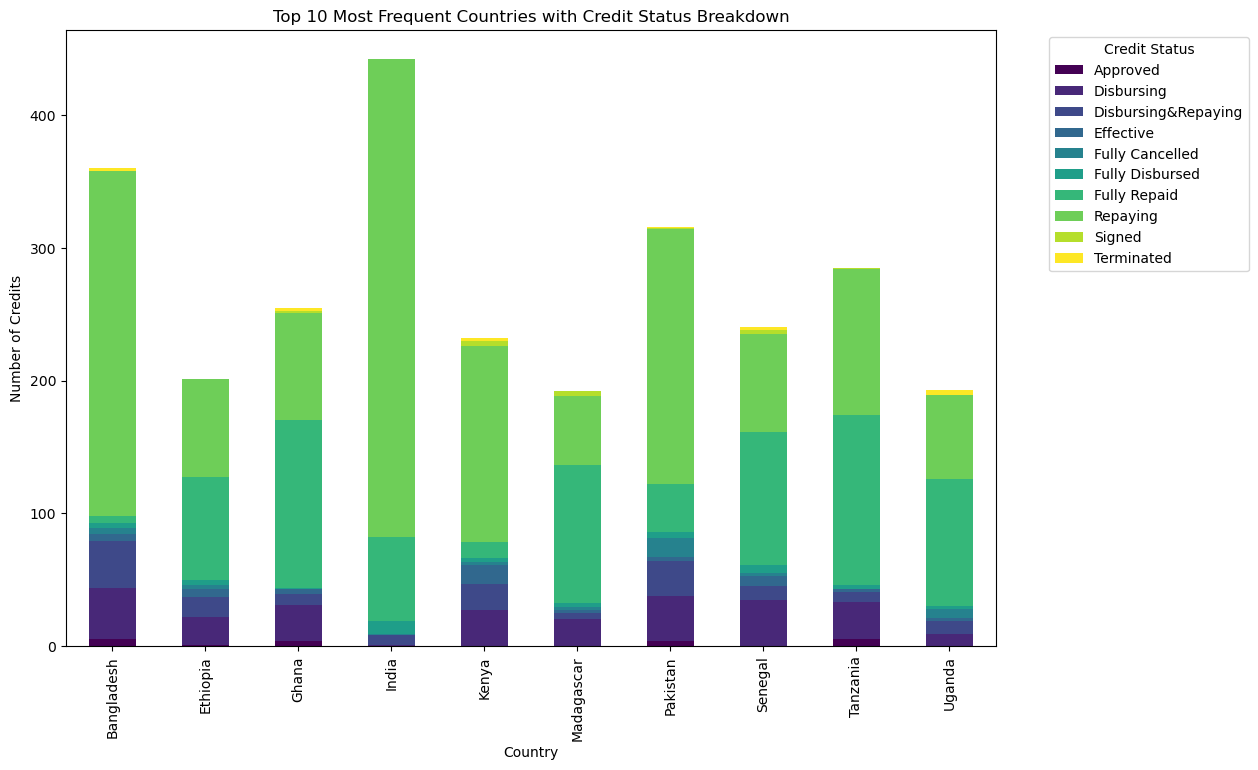

In [6]:
# Create a pivot table to count the occurrences of each credit status for the top 10 countries
top_10_countries = data['Country'].value_counts().head(10)
top_10_countries_data = data[data['Country'].isin(top_10_countries.index)]
pivot_table_top_10 = top_10_countries_data.pivot_table(index='Country', columns='Credit Status', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
pivot_table_top_10.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Top 10 Most Frequent Countries with Credit Status Breakdown')
plt.xlabel('Country')
plt.ylabel('Number of Credits')
plt.legend(title='Credit Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From this stacked bar chart we see that each of the top 10 countries all have a similar proportion of crediyts still be repaid.

### Continuous feature analysis ###

In [7]:
data.describe()

,Service Charge Rate,Original Principal Amount (US$),Cancelled Amount (US$),Undisbursed Amount (US$),Disbursed Amount (US$),Repaid to IDA (US$),Due to IDA (US$),Exchange Adjustment (US$),Borrower's Obligation (US$),Sold 3rd Party (US$),Repaid 3rd Party (US$),Due 3rd Party (US$),Credits Held (US$)
count,8188.000000,8.298000e+03,8.298000e+03,8.298000e+03,8.298000e+03,8.298000e+03,8.298000e+03,8298.0,8.298000e+03,8.298000e+03,8.298000e+03,8298.0,8.298000e+03
mean,0.928169,5.629984e+07,4.444738e+06,9.299796e+06,4.261844e+07,1.702216e+07,2.504809e+07,0.0,2.504809e+07,1.277615e+04,1.277615e+04,0.0,3.434788e+07
std,0.637007,8.708277e+07,2.171301e+07,4.192696e+07,6.965824e+07,3.115467e+07,5.894747e+07,0.0,5.894747e+07,3.090340e+05,3.090340e+05,0.0,7.469192e+07
min,0.000000,0.000000e+00,0.000000e+00,-1.000000e-02,0.000000e+00,0.000000e+00,-3.170000e+00,0.0,-3.170000e+00,0.000000e+00,0.000000e+00,0.0,-3.170000e+00
25%,0.750000,1.000000e+07,0.000000e+00,0.000000e+00,6.500000e+06,8.625728e+05,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
50%,0.750000,2.500000e+07,7.011890e+03,0.000000e+00,1.852653e+07,5.964340e+06,3.623503e+06,0.0,3.623503e+06,0.000000e+00,0.000000e+00,0.0,5.498464e+06
75%,0.750000,6.487500e+07,1.252049e+06,0.000000e+00,4.898607e+07,1.864771e+07,2.315364e+07,0.0,2.315364e+07,0.000000e+00,0.000000e+00,0.0,3.240796e+07
max,7.080000,1.200000e+09,1.200000e+09,7.610936e+08,1.010412e+09,5.617663e+08,1.047849e+09,0.0,1.047849e+09,1.750000e+07,1.750000e+07,0.0,1.048785e+09


We can see there are two columns that contain only zeros, so these would not be useful for any classification task.

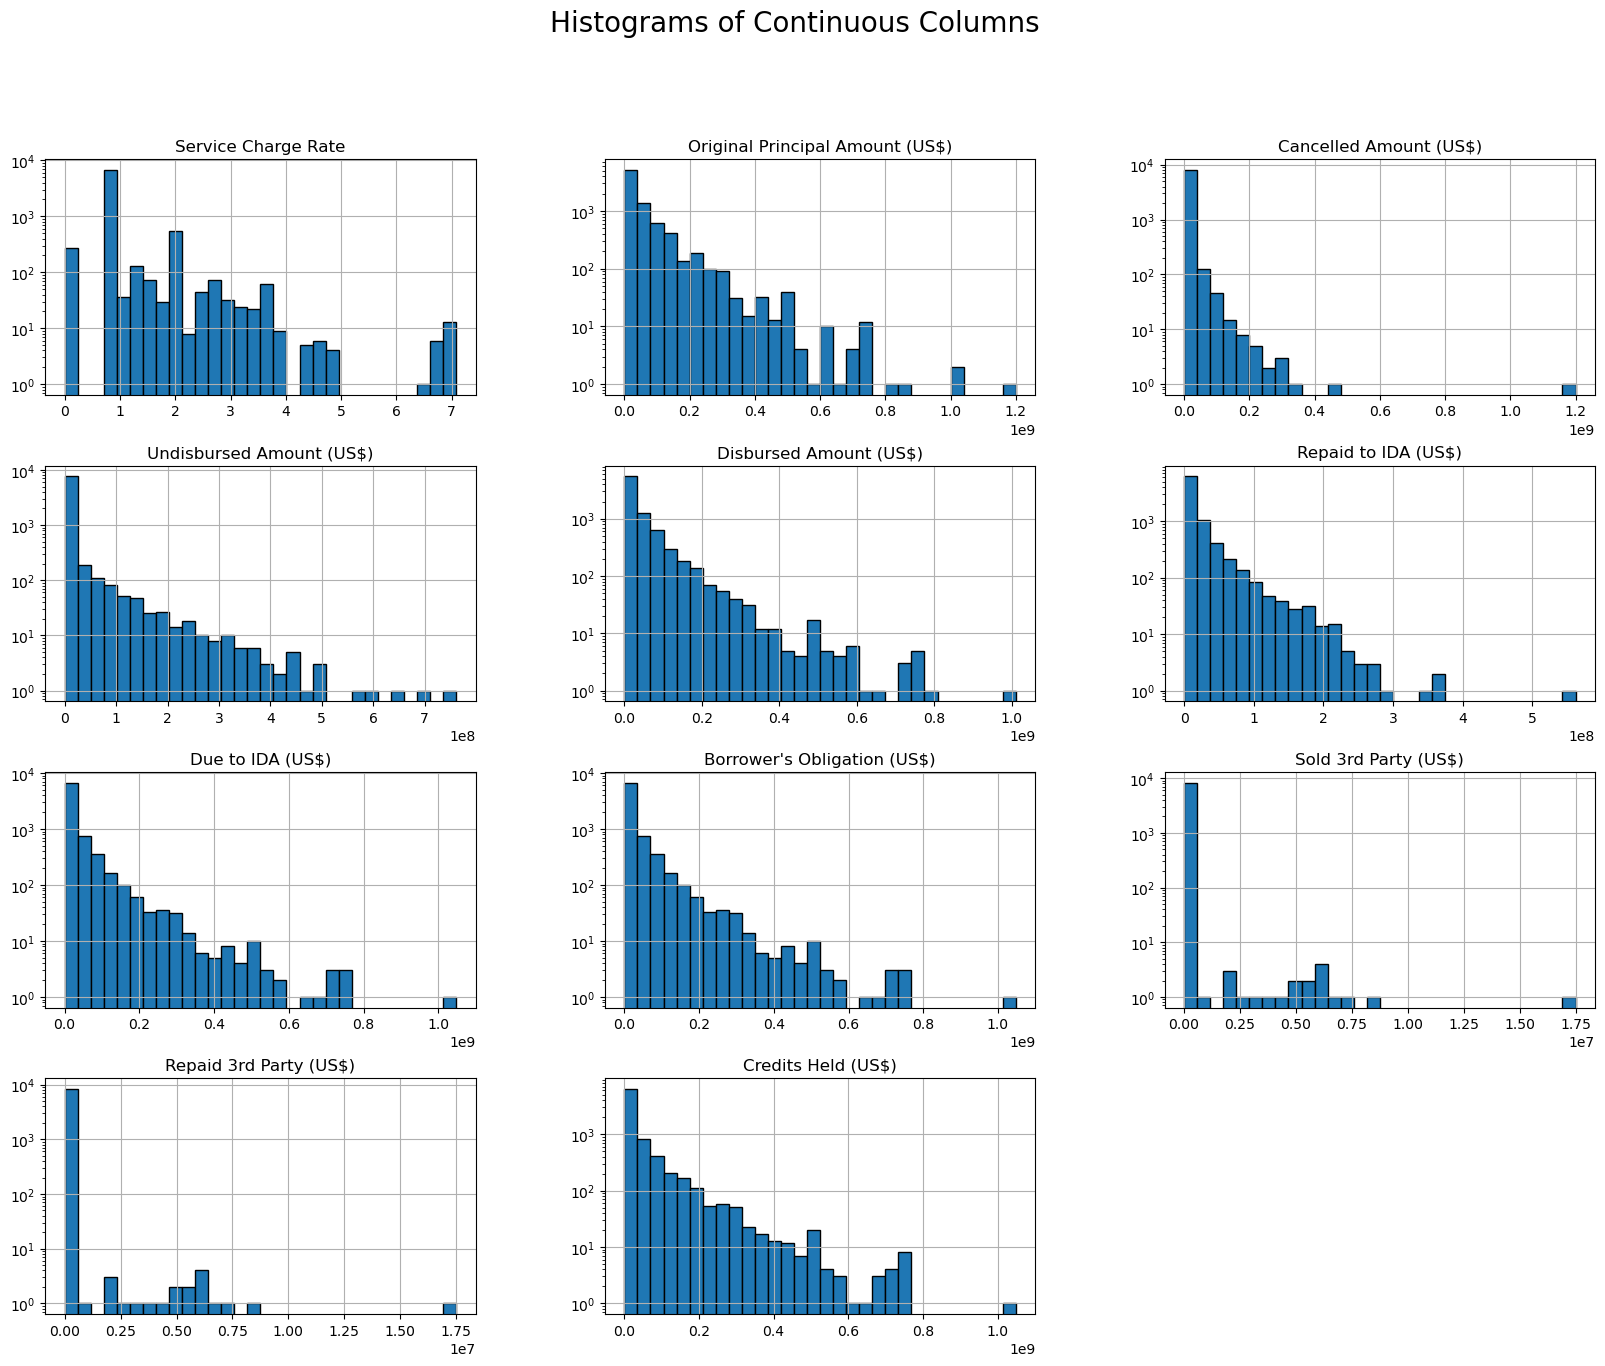

In [8]:
# Plot histograms for all continuous columns excluding 'Exchange Adjustment (US$)' and 'Due 3rd Party (US$)'
continuous_columns = data.select_dtypes(include=[np.number]).columns.tolist()
columns_to_exclude = ['Exchange Adjustment (US$)', 'Due 3rd Party (US$)']
continuous_columns = [col for col in continuous_columns if col not in columns_to_exclude]

data[continuous_columns].hist(figsize=(20, 15), bins=30, edgecolor='black', log=True)
plt.suptitle('Histograms of Continuous Columns', fontsize=20)
plt.show()

A lot of the data appears to have a very similar distribution, this is a slight concern already as if the features are also strongly correlated the large amount of features we have may not be of much benefit. It is likely that a lot of the features are proportional to the Original Proportional Amount, hence follow a similar distribution.

We will check the correlation between these features now.

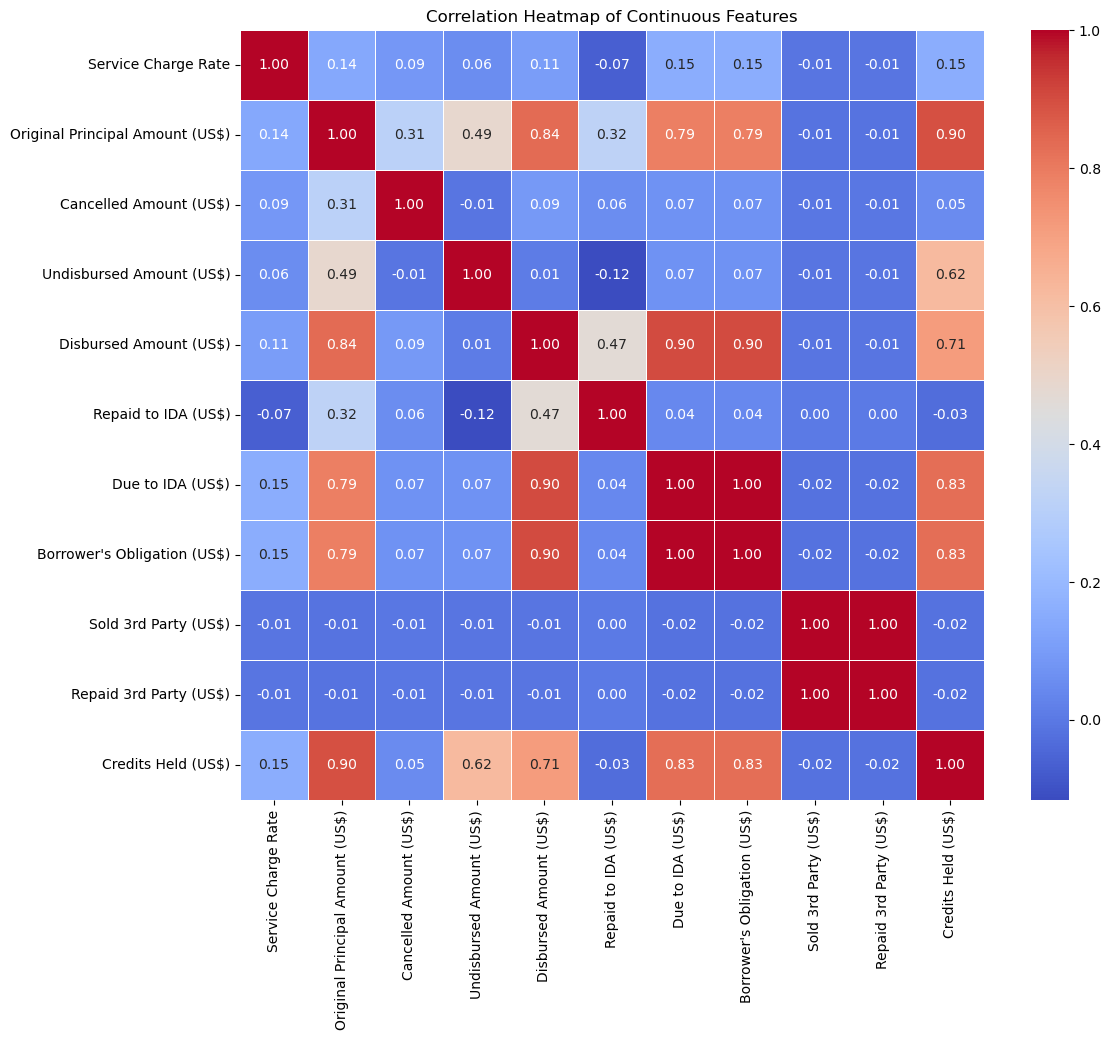

In [9]:

# Calculate the correlation matrix
correlation_matrix = data[continuous_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

We see that there are quite a few strong correlations but mainly ones that we would expect / are fairly obvious assumptions, such as a lot of the features having positive correlation to the Original Principle Amount as this impacts the scale of all the features. We also have lots of features that show no correlation but this is more to do with the details of the credit, e.g. A lot of the credits have no third party involved so there is unlikely to be any kind of relation between any of the 3rd party columns to any other feature.

We will now take a look at the mean of each feature relative to the credit status

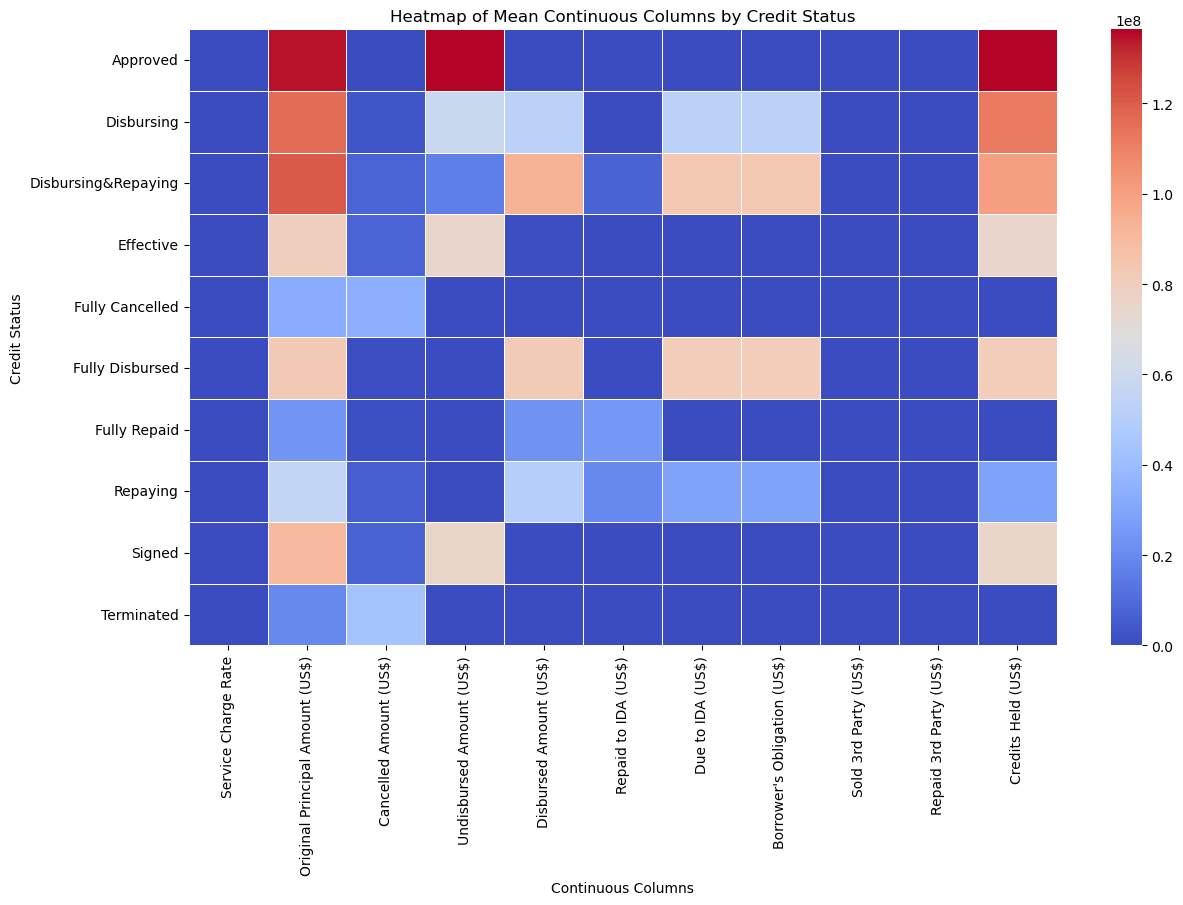

In [10]:
# Calculate the mean of continuous columns grouped by credit status
mean_by_credit_status = data.groupby('Credit Status')[continuous_columns].mean()

# Create a heatmap of the mean of continuous columns against the credit status
plt.figure(figsize=(14, 8))
sns.heatmap(mean_by_credit_status, annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Mean Continuous Columns by Credit Status')
plt.xlabel('Continuous Columns')
plt.ylabel('Credit Status')
plt.show()

This is the greatest concern I have of this dataset, in each credit status there are two many features that have a 0 value for a few of the features. This is a problem as I think it is too deterministic as the value of the features are not independent of the credit status, e.g. if a credit is fully repaid we know that Due to IDA will be 0.

## We will now look at some of the discrete features ##

In [11]:
# Create a list of all discrete features
discrete_columns = data.select_dtypes(include=['object']).columns.tolist()
print(discrete_columns)

['End of Period', 'Credit Number', 'Region', 'Country Code', 'Country', 'Borrower', 'Credit Status', 'Currency of Commitment', 'Project ID', 'Project Name', 'First Repayment Date', 'Last Repayment Date', 'Agreement Signing Date', 'Board Approval Date', 'Effective Date (Most Recent)', 'Closed Date (Most Recent)', 'Last Disbursement Date']


Most our discrete data is dates about the credit agreements, the problem with this is if we have a closing date or last repayment date we know likely what the credit status is.

In [12]:
date_columns = ['End of Period', 'First Repayment Date', 'Last Repayment Date', 'Agreement Signing Date', 'Board Approval Date', 'Effective Date (Most Recent)', 'Closed Date (Most Recent)', 'Last Disbursement Date']

In [13]:
# Convert date columns to datetime and format to month and year
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce').dt.year

C:\Users\44747\AppData\Local\Temp\ipykernel_35696\2340363002.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce').dt.year
C:\Users\44747\AppData\Local\Temp\ipykernel_35696\2340363002.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce').dt.year
C:\Users\44747\AppData\Local\Temp\ipykernel_35696\2340363002.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce').dt.year
C:\Users\44747\AppData\Local\Temp\ipykernel_35696\23

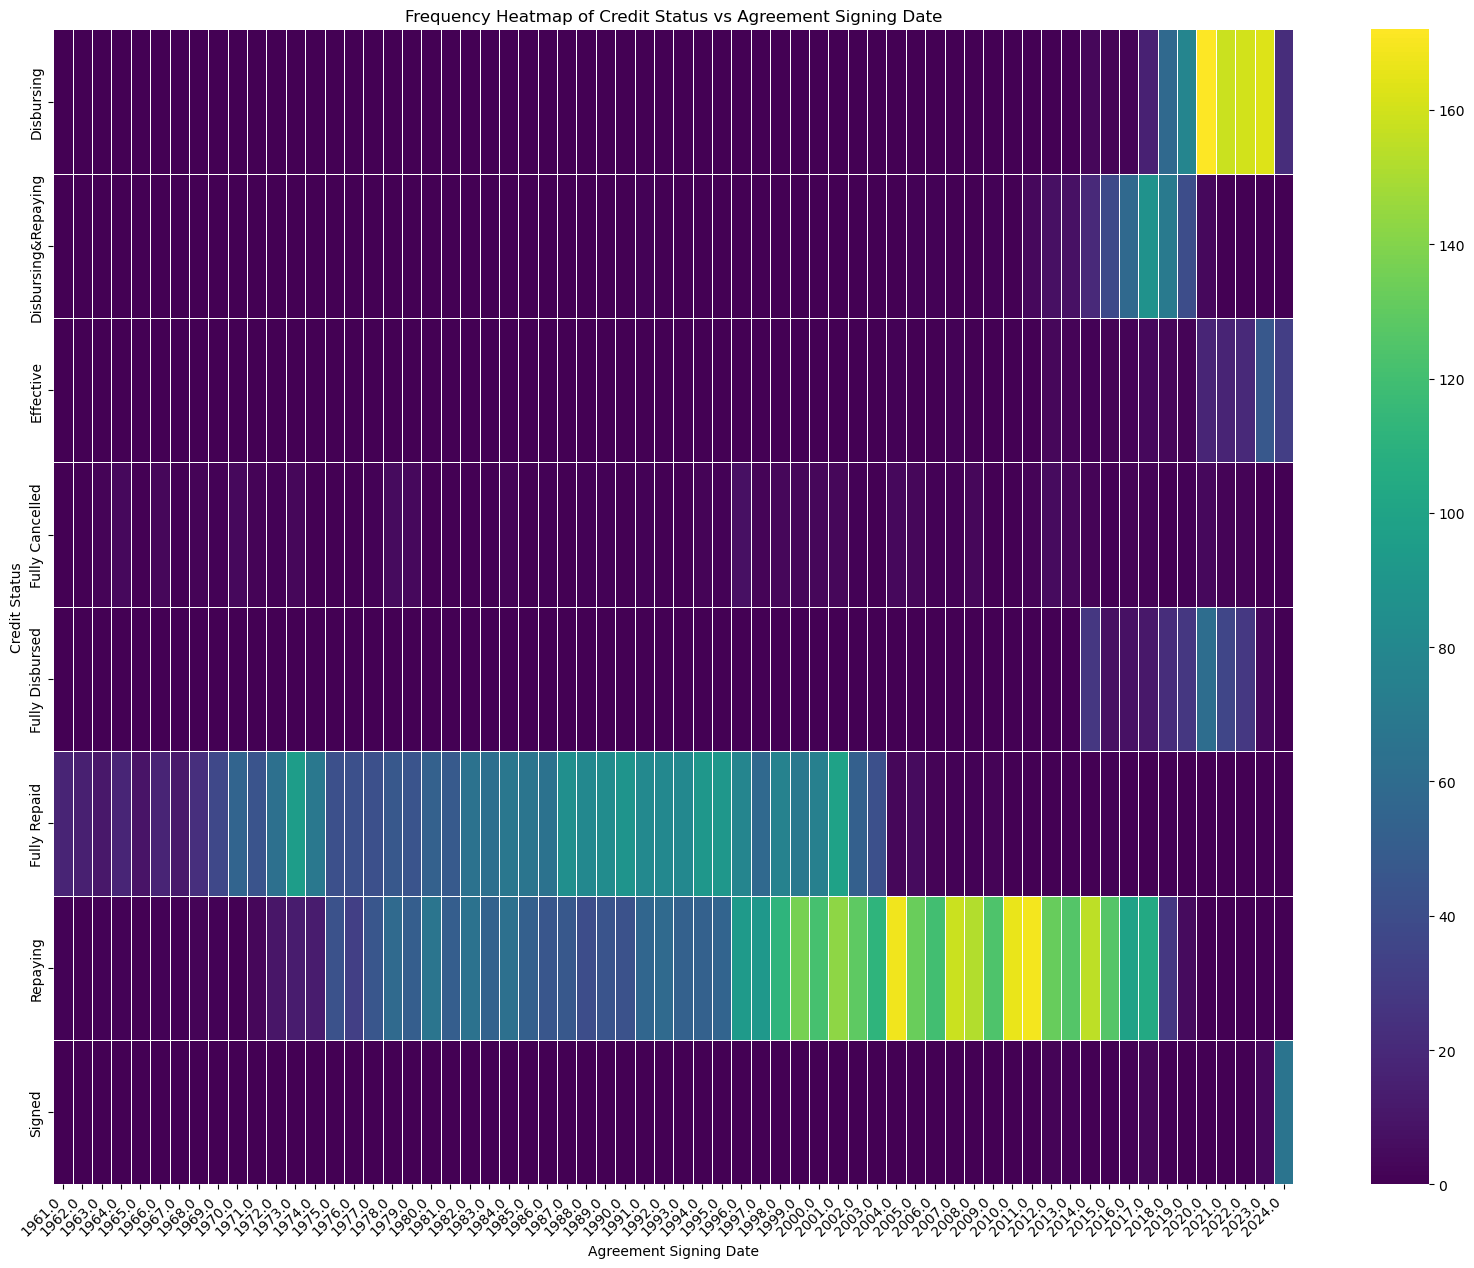

In [14]:
# Create a pivot table to count the occurrences of each credit status for 'Last Disbursement Date'
pivot_table_last_disbursement = data.pivot_table(index='Credit Status', columns='Agreement Signing Date', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(pivot_table_last_disbursement, annot=False, fmt='d', cmap='viridis', linewidths=0.5)
plt.title('Frequency Heatmap of Credit Status vs Agreement Signing Date')
plt.xlabel('Agreement Signing Date')
plt.ylabel('Credit Status')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see that the Agreement Signing date would give us a good indication of the credit status, clearly anything before 2014 is likely to be fully repaid or still repaying.

A better use of this dataset could be to try and predict how long it will take to repay the credits as we can see extremly few get cancelled.

In [15]:
# Create a column "Time taken to repay" and calculate the difference between 'Last Repayment Date' and 'First Repayment Date' for fully repaid credits
data['Time taken to repay'] = np.where(data['Credit Status'] == 'Fully Repaid', 
                                       data['Last Repayment Date'] - data['First Repayment Date'], 
                                       np.nan)


In [16]:
# Filter data for fully repaid credits
fully_repaid_data = data[data['Credit Status'] == 'Fully Repaid']

In [17]:
fully_repaid_data['Time taken to repay'].describe()

count    2456.000000
mean       33.995521
std         5.980040
min         2.000000
25%        30.000000
50%        30.000000
75%        40.000000
max        47.000000
Name: Time taken to repay, dtype: float64

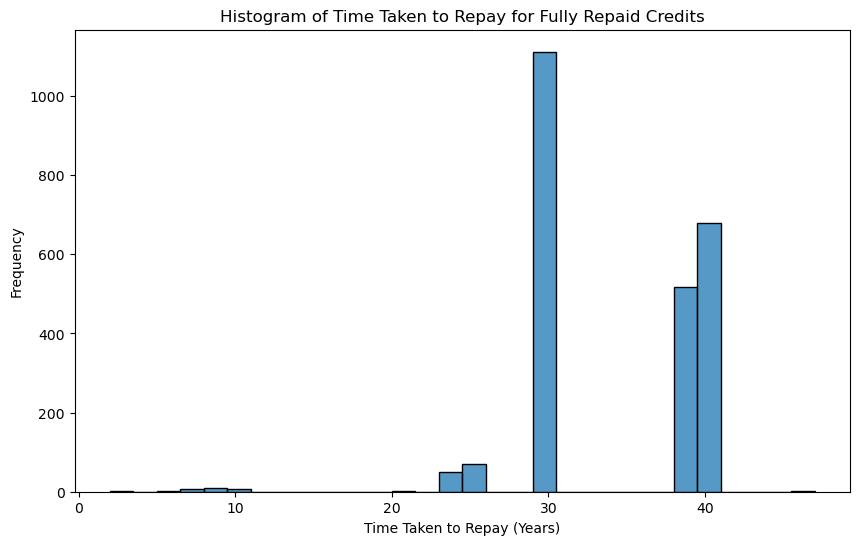

In [18]:
# Plot histogram of time taken to repay
plt.figure(figsize=(10, 6))
sns.histplot(data=fully_repaid_data, x='Time taken to repay', bins=30, kde=False)
plt.title('Histogram of Time Taken to Repay for Fully Repaid Credits')
plt.xlabel('Time Taken to Repay (Years)')
plt.ylabel('Frequency')
plt.show()

Again this doesn't seem to be too interesting it appears like most the credits are probably given a fixed time that they have to be repaid in, either 10/30/40years.

### Conclusion ###

I don't think this dataset is suitable for a classification task, we could try classifying into credit status but then the rest of the features either tell us nothing or practically tell us the credit status. A better idea might be to try and predict the amount of time it takes for the credit to be fully repaid. However, I believe the dataset would need to be combined with another to provide significant economic background on each country to allow us to try and make a good prediction without using any of the other date features which would make it a bit too easy. I don't think this is really feasible though as the repayment time is over potentially 40 years so we would need economic information for each country for the whole of this time. We could just get economic information for the country at the time the loan is given but even this would involve combining an extremely large number of datasets with us needing information for all the different countries for all the different years that credits are taken out. This doesn't even take into account that most the credits seem to be repaid on a fixed time period 10/30/40years, this is likely predetermined when the credit is given out so doesnt realy seem suitable to try and predict it.